# Задание 5. Извлечение данных 

## Задание 5.1

Напишите скрипт, который скачивает  сообщения с Телеграм-канала https://t.me/Sputnik_results . Сохраните сообщения в формате по вашему выбору (.csv, .jsonl, sqlite, parquet, и т.д.). Откройте с помощью Pandas или аналогичных библиотек, постройте график числа сообщений в зависимости от даты. 

## Задание 5.2
1.Напишите функции для извлечения данных из сообщений:
   - пол участника
   - возраст участника

   Постройте диаграммы для визуализации. 

2.Реализуйте какой-либо анализ этих данных на ваше усмотрение. Например их можно кластеризовать и интерпретировать кластеры, или попробовать выделить статистику по среднему количеству антител в зависимости от возраста, или посчитать количество заболевших после вакцинации. Обязательна визуализация. 

Парсер тг канал также выложен в репозитории (main.py), здесь использую полученные данные - chats.csv

In [2]:
from google.colab import files
uploaded = files.upload()
#сюда загружаем файлы для анализа (chats.csv)

Saving chats.csv to chats.csv


In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('chats.csv', encoding='utf-8', names = ['Message'], header = None, index_col=False, parse_dates=[0])

In [5]:
data.head(9)

,Message
0,Народные отчеты о вакцинации\r\n\r\n⚠️ ТОЛЬКО ...
1,В этом можно только публиковать отчёты.\r\nЕсл...
2,"Здравствуйте \r\nПодскажите пожалуйста, куда н..."
3,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...
4,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...
5,"Ж, 20 лет, умеренный аллергик. Сделала Спутник..."
6,"M40, без хронических болезней, в феврале 2022 ..."
7,"#ревак #назально #спутник\r\n\r\nЖ53, ковидом ..."
8,"Пол, возраст, наличие хр.заболеваний укажите, ..."


In [6]:
import re

In [7]:
list_sex = []
list_age = []
list = []
for i in data.iloc:
  ans = re.findall("[ЖМжм]\d{2}",str(i))
  if len(ans) != 0:
    list.extend([ans])
for i in list:
  list_sex.append(i[0][0].upper())
  list_age.append(i[0][1:])


In [8]:
df = pd.DataFrame({'age':list_age,
                  'sex':list_sex})
df.to_csv('file2.csv', index=False, header=False)


In [9]:
print(df)

     age sex
0     53   Ж
1     33   М
2     35   Ж
3     37   Ж
4     50   Ж
...   ..  ..
9250  43   М
9251  47   Ж
9252  32   Ж
9253  34   Ж
9254  37   М

[9255 rows x 2 columns]


In [10]:
 ag = df['age'].value_counts().rename_axis('age').reset_index(name='Amount').sort_values('age')

In [11]:
sx =  df['sex'].value_counts().rename_axis('sex').reset_index(name='Amount')

In [12]:
print(ag)

   age  Amount
80  11       1
65  12      18
62  13      21
60  14      22
69  15      14
..  ..     ...
75  89       3
73  90       7
79  91       2
81  93       1
77  94       2

[82 rows x 2 columns]


In [13]:
x = ag['age'].tolist()
y = ag['Amount'].tolist()

<BarContainer object of 82 artists>

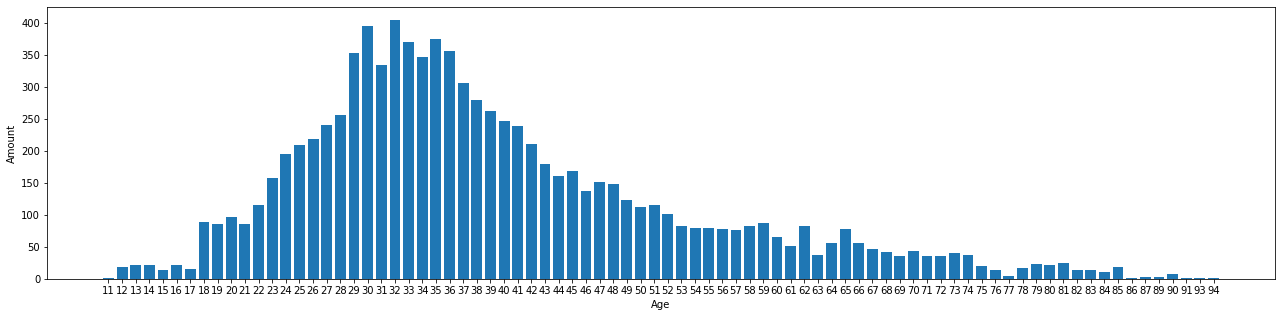

In [14]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(22,5))
plt.ylabel('Amount')
plt.xlabel('Age')
plt.bar(x, y)

In [15]:
print(sx)

  sex  Amount
0   Ж    5579
1   М    3676


In [16]:
labels = sx['sex'].tolist()
amount = sx['Amount'].tolist()

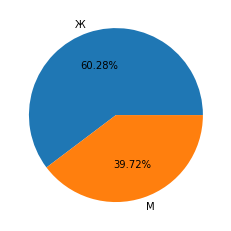

In [17]:
fig1, ax1 = plt.subplots()
ax1.pie(amount, labels=labels,autopct='%1.2f%%')
plt.show()

В качестве анализа я выделила самые распространенные симптомы короновируса и оценила частоту их появления у участников телеграм канала

In [19]:
temp = 0 #температура
cough = 0 #кашель
r_nose = 0 #насморк
edema = 0 #отек
chills= 0 #озноб
vomit = 0 #рвота
itch = 0 #зуд
headache = 0 #головная боль
drowsiness = 0 #слабость
aches = 0 #ломота
fever = 0 #лихорадка
for i in data.iloc:
  ans = re.findall("температура",str(i))
  if len(ans) != 0:
    temp+=len(ans)
  ans = re.findall("кашель",str(i))
  if len(ans) != 0:
    cough+=len(ans)
  ans = re.findall("насморк",str(i))
  if len(ans) != 0:
    r_nose+=len(ans)
  ans = re.findall("отек",str(i))
  if len(ans) != 0:
    edema+=len(ans)
  ans = re.findall("зуд",str(i))
  if len(ans) != 0:
    itch+=len(ans)
  ans = re.findall("рвота",str(i))
  if len(ans) != 0:
    vomit+=len(ans)
  ans = re.findall("озноб",str(i))
  if len(ans) != 0:
    chills+=len(ans)
  ans = re.findall("головная боль",str(i))
  if len(ans) != 0:
    headache+=len(ans)
  ans = re.findall("слабость",str(i))
  if len(ans) != 0:
    drowsiness+=len(ans)
  ans = re.findall("ломота",str(i))
  if len(ans) != 0:
    aches+=len(ans)
  ans = re.findall("лихорадка",str(i))
  if len(ans) != 0:
    fever+=len(ans)


In [21]:
am = [temp, cough, r_nose, edema, itch, vomit, chills, headache, drowsiness, aches, fever]

In [22]:
labels = ['температура','кашель','насморк','отек','зуд','рвота','озноб','головная боль','слабость','ломота','лихорадка']

<BarContainer object of 11 artists>

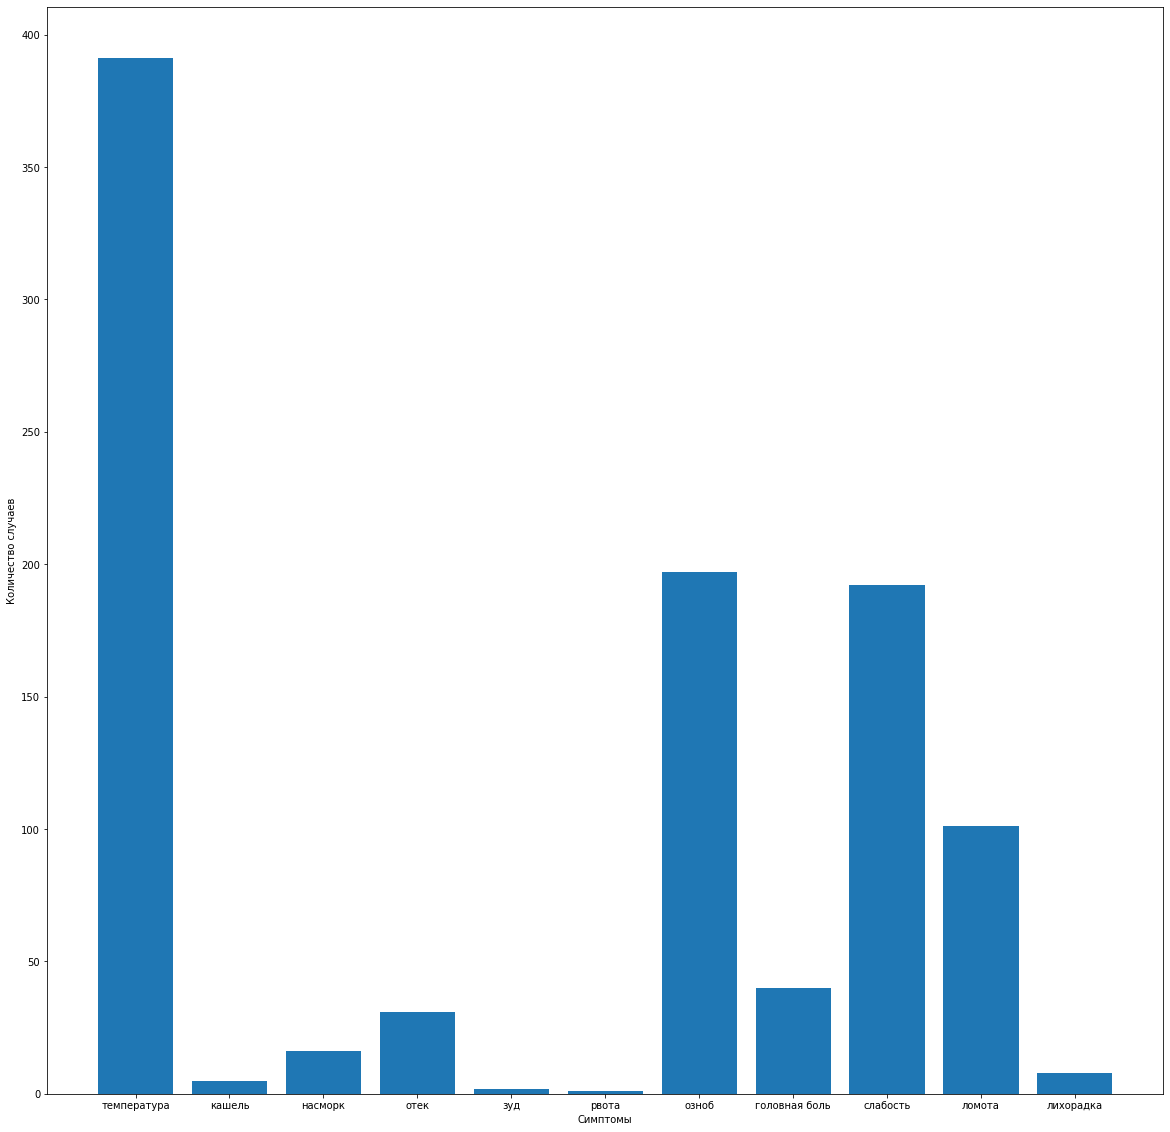

In [23]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(20,20))
plt.ylabel('Количество случаев')
plt.xlabel('Симптомы')
plt.bar(labels, am)